<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Project 1: Employee Attribution 

## Employee Attrition Data: 

### What is Employee Attrition?

Employee attrition is a gradual but deliberate reduction in the number of employees in a company or business organization. Employees will at some point in time look to change their job places for a number of reasons.

### Why is Employee Attrition matters?
Having a clear view of employee attrition rate helps to identify the problems and come up with solutions to retain employees from leaving.

#### Formula: 

[ Rate of attrition = (number of employees that left the company / the average number of employees) x 100% ]

A high attrition rate indicates that your employees are leaving frequently, while a low rate shows that you’re keeping your employees for longer periods of time.



#### In this lab, we'll explore this dataset to find which area contributes to the highest attrition.

- Which job has the highest Employee Attrition?
- Which age group has the highest Employee Attrition? 
- Does wokelifebalance affect the Employee Attrition? 

Original Data: [Employee Attrition Dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

Data Dictionary: [Variables](https://docs.google.com/document/d/13ZmQYOlnJyUBWpX8-Nge-KJ8XcqS7N3crFx9-Oz1hk0/edit)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import stats

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Taking a glance at the data

In [2]:
#Reading the file
#First 5 rows of data
data = pd.read_csv("Employee-Attrition.csv.xls")
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
#Dimension of data
data.shape

(1470, 35)

In [4]:
#Understand the Variables 
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Columns considering to drop: 
Remove unneeded features (employee_count, standart_hours and over18 have the same value for all observations)

[ EmployeeCount ]: Numbers are the same

[ EmployeeNumber ]: Counting the number of employee in the company, not giving any insights to the finding.

[ StandardHours ]: Numbers are the same 

In [5]:
#Explore the data types of each column
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
#Checking Null Value in the Data, there are no missing values 
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [8]:
for index, row in data.iterrows():
    print(index, row)

0 Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                      

Name: 180, dtype: object
181 Age                                             34
Attrition                                       No
BusinessTravel                       Travel_Rarely
DailyRate                                      629
Department                  Research & Development
DistanceFromHome                                27
Education                                        2
EducationField                             Medical
EmployeeCount                                    1
EmployeeNumber                                 247
EnvironmentSatisfaction                          4
Gender                                      Female
HourlyRate                                      95
JobInvolvement                                   3
JobLevel                                         1
JobRole                         Research Scientist
JobSatisfaction                                  2
MaritalStatus                               Single
MonthlyIncome                                 2311
Mo

Name: 415, dtype: object
416 Age                                             38
Attrition                                       No
BusinessTravel                   Travel_Frequently
DailyRate                                     1490
Department                  Research & Development
DistanceFromHome                                 2
Education                                        2
EducationField                       Life Sciences
EmployeeCount                                    1
EmployeeNumber                                 556
EnvironmentSatisfaction                          4
Gender                                        Male
HourlyRate                                      42
JobInvolvement                                   3
JobLevel                                         1
JobRole                      Laboratory Technician
JobSatisfaction                                  4
MaritalStatus                              Married
MonthlyIncome                                 1702
Mo

Name: 527, dtype: object
528 Age                                        50
Attrition                                 Yes
BusinessTravel              Travel_Frequently
DailyRate                                 562
Department                              Sales
DistanceFromHome                            8
Education                                   2
EducationField               Technical Degree
EmployeeCount                               1
EmployeeNumber                            723
EnvironmentSatisfaction                     2
Gender                                   Male
HourlyRate                                 50
JobInvolvement                              3
JobLevel                                    2
JobRole                       Sales Executive
JobSatisfaction                             3
MaritalStatus                         Married
MonthlyIncome                            6796
MonthlyRate                             23452
NumCompaniesWorked                          3
Over1

711 Age                                             29
Attrition                                      Yes
BusinessTravel                       Travel_Rarely
DailyRate                                      906
Department                  Research & Development
DistanceFromHome                                10
Education                                        3
EducationField                       Life Sciences
EmployeeCount                                    1
EmployeeNumber                                 994
EnvironmentSatisfaction                          4
Gender                                      Female
HourlyRate                                      92
JobInvolvement                                   2
JobLevel                                         1
JobRole                         Research Scientist
JobSatisfaction                                  1
MaritalStatus                               Single
MonthlyIncome                                 2404
MonthlyRate                

Name: 869, dtype: object
870 Age                                      35
Attrition                                No
BusinessTravel                Travel_Rarely
DailyRate                              1361
Department                            Sales
DistanceFromHome                         17
Education                                 4
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                         1218
EnvironmentSatisfaction                   3
Gender                                 Male
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           1
MaritalStatus                       Married
MonthlyIncome                          8966
MonthlyRate                           21026
NumCompaniesWorked                        3
Over18                                    Y
Ove

Name: 1063, dtype: object
1064 Age                                      30
Attrition                                No
BusinessTravel                Travel_Rarely
DailyRate                               330
Department                  Human Resources
DistanceFromHome                          1
Education                                 3
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                         1499
EnvironmentSatisfaction                   3
Gender                                 Male
HourlyRate                               46
JobInvolvement                            3
JobLevel                                  1
JobRole                     Human Resources
JobSatisfaction                           3
MaritalStatus                      Divorced
MonthlyIncome                          2064
MonthlyRate                           15428
NumCompaniesWorked                        0
Over18                                    Y
O

Name: 1210, dtype: object
1211 Age                                        37
Attrition                                  No
BusinessTravel              Travel_Frequently
DailyRate                                1278
Department                              Sales
DistanceFromHome                            1
Education                                   4
EducationField                        Medical
EmployeeCount                               1
EmployeeNumber                           1700
EnvironmentSatisfaction                     3
Gender                                   Male
HourlyRate                                 31
JobInvolvement                              1
JobLevel                                    2
JobRole                       Sales Executive
JobSatisfaction                             4
MaritalStatus                        Divorced
MonthlyIncome                            9525
MonthlyRate                              7677
NumCompaniesWorked                          1
Ove

Name: 1405, dtype: object
1406 Age                                             54
Attrition                                       No
BusinessTravel                       Travel_Rarely
DailyRate                                      157
Department                  Research & Development
DistanceFromHome                                10
Education                                        3
EducationField                             Medical
EmployeeCount                                    1
EmployeeNumber                                1980
EnvironmentSatisfaction                          3
Gender                                      Female
HourlyRate                                      77
JobInvolvement                                   3
JobLevel                                         2
JobRole                     Manufacturing Director
JobSatisfaction                                  1
MaritalStatus                               Single
MonthlyIncome                                 4440


In [9]:
data['Age'].unique() #Whats inside the variable

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [10]:
data.iloc[[0]].iterrows()

<generator object DataFrame.iterrows at 0x7fb368afd5f0>

In [11]:
def filter_row(df, MonthlyIncome = 10000):
    return df.loc[df['MonthlyIncome']>10000, ['YearsSinceLastPromotion', 'YearsWithCurrManager']]
filter_row(data)

YearsSinceLastPromotion  YearsWithCurrManager
18                          3                     7
22                          2                    11
25                          4                     8
28                          5                    17
29                          2                     1
...                       ...                   ...
1437                        1                     3
1443                        4                    14
1445                        0                    10
1461                        2                     0
1462                        9                     6

[281 rows x 2 columns]

#### How is Attrition depend on age?

In [12]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

(array([ 237.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

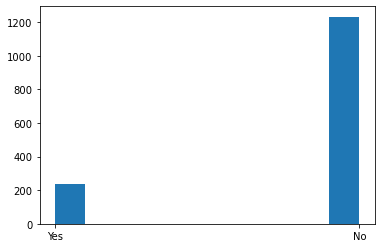

In [13]:
plt.hist(data['Attrition'])

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

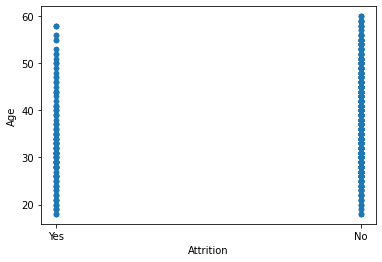

In [14]:
data.plot(kind='scatter', x='Attrition', y='Age')

Text(0, 0.5, 'MonthlyIncome')

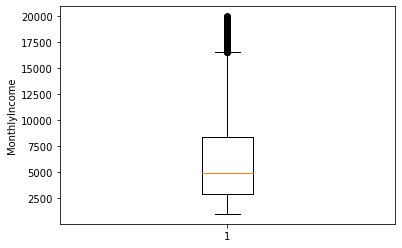

In [15]:
plt.boxplot(data['MonthlyIncome'])
plt.ylabel('MonthlyIncome')

In [16]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'Attrition': 'count'
    }
    _groupby = ['Age', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Age')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

In [17]:
aggregation = {'Attrition': 'count'}
columns = ['Age', 'Attrition']
df_feature = data.groupby(by=columns).agg(aggregation)
df_feature

Attrition
Age Attrition           
18  No                 4
    Yes                4
19  No                 3
    Yes                6
20  No                 5
...                  ...
57  No                 4
58  No                 9
    Yes                5
59  No                10
60  No                 5

[82 rows x 1 columns]

In [18]:
#data['Attrition'] = data['Attrition'].map({'yes': 1, 'no': 0})
#data['Attrition'].dtypes

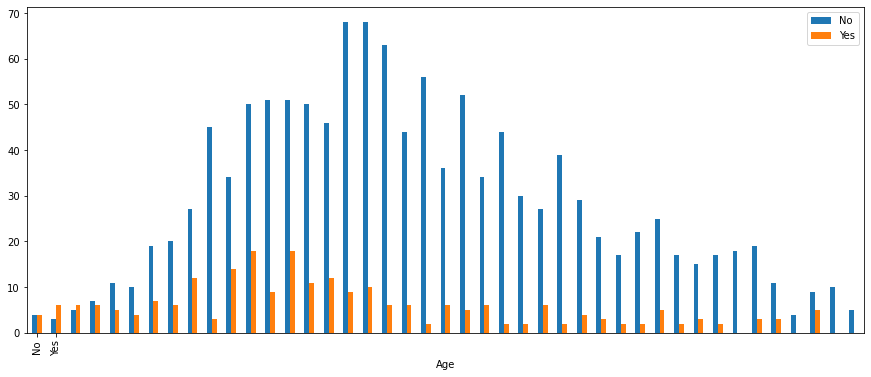

In [19]:
bar_charts(data, 'Attrition')

#### How is Attrition depend on MonthlyIncome

In [20]:
data.MonthlyIncome.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

Text(0, 0.5, 'MonthlyIncome')

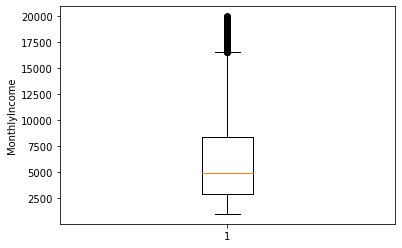

In [21]:
plt.boxplot(data['MonthlyIncome'])
plt.ylabel('MonthlyIncome')

In [22]:
def create_Income_class(x):
    if x > 15000:
        Income_class = 1
    elif x > 10000 and x <= 15000:
        Income_class = 2
    elif x > 5000 and x <= 10000:
        Income_class = 3
    else:
        Income_class = 4
    return Income_class

In [23]:
data['IncomeRange'] = data['MonthlyIncome'].apply(create_Income_class)
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  StandardHours StockOptionLevel  TotalWorkingYears  \
0  ...             80                0                  8   
1  ...             80                1                 10   
2  ...             80                0                  7   
3  ...             80                0                  8   
4  ...             80                1                  6   

   TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                      0                1              6                   4   
1                      3                3             10                   7   
2                      3                3              0                   0   
3                      3                3              8                   7   
4                      3                3              2                   2   

  YearsSinceLastPromotion  YearsWithCurrManager  IncomeRange  
0                       0                     5            3  
1                       1                     7            3  
2                       0                     0            4  
3                       3                     0            4  
4                       2                     2            4  

[5 rows x 36 columns]

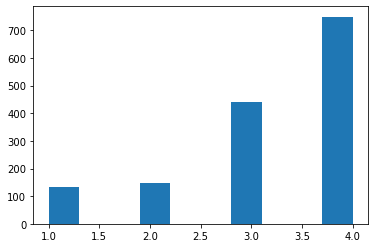

In [24]:
plt.hist(data['IncomeRange']);

In [25]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [26]:
data.groupby('EducationField')['Attrition'].value_counts()

EducationField    Attrition
Human Resources   No            20
                  Yes            7
Life Sciences     No           517
                  Yes           89
Marketing         No           124
                  Yes           35
Medical           No           401
                  Yes           63
Other             No            71
                  Yes           11
Technical Degree  No           100
                  Yes           32
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Age'>

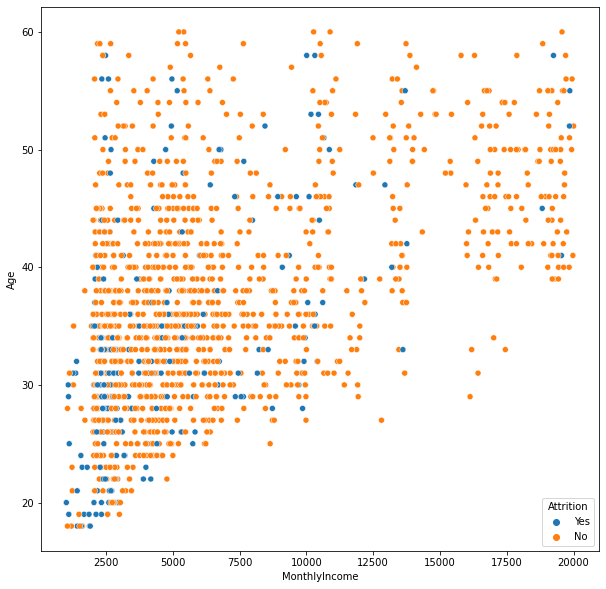

In [27]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'MonthlyIncome', y = 'Age', data = data, hue = 'Attrition')

In [28]:
#Find correlation between Attrition and other features.
data.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   
IncomeRange              -0.497106  -0.012299          0.020521  -0.107246   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   
IncomeRange                         NaN        0.010316   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                      

<AxesSubplot:>

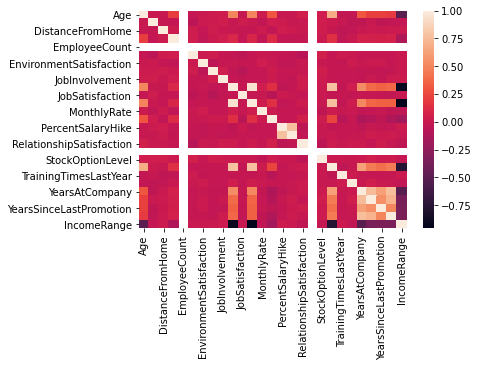

In [29]:
sns.heatmap(data.corr())

In [30]:
data.groupby(['Attrition'])[['Age','DailyRate','HourlyRate','MonthlyRate','MonthlyIncome']].mean()

Age   DailyRate  HourlyRate   MonthlyRate  MonthlyIncome
Attrition                                                                
No         37.561233  812.504461   65.952149  14265.779400    6832.739659
Yes        33.607595  750.362869   65.573840  14559.308017    4787.092827

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Age'>

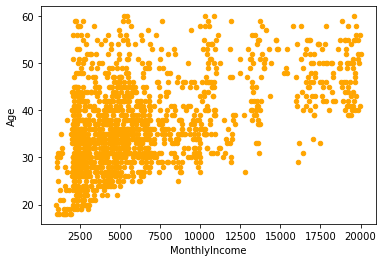

In [31]:
data.plot.scatter(x='MonthlyIncome',y='Age',c='Orange')

In [32]:
#data['Attrition'] = data['Attrition'].map({'yes': 1, 'no': 0})
#data['Attrition'].dtypes

In [33]:
#data.plot.barh(x='Age',y='Attrition')

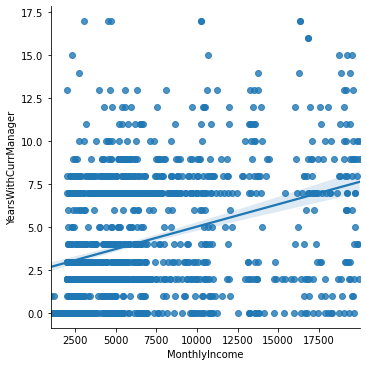

In [34]:
sns.lmplot(x="MonthlyIncome", y="YearsWithCurrManager", data=data, hue=None, fit_reg = True)

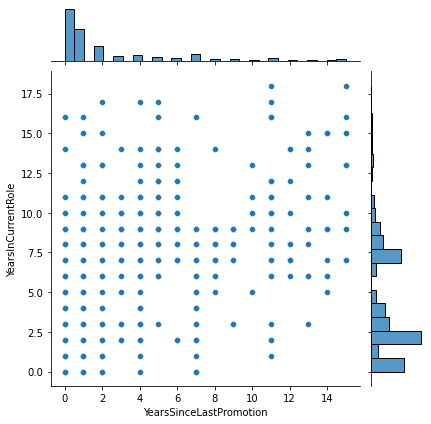

In [35]:
sns.jointplot(data=data, x="YearsSinceLastPromotion", y="YearsInCurrentRole")

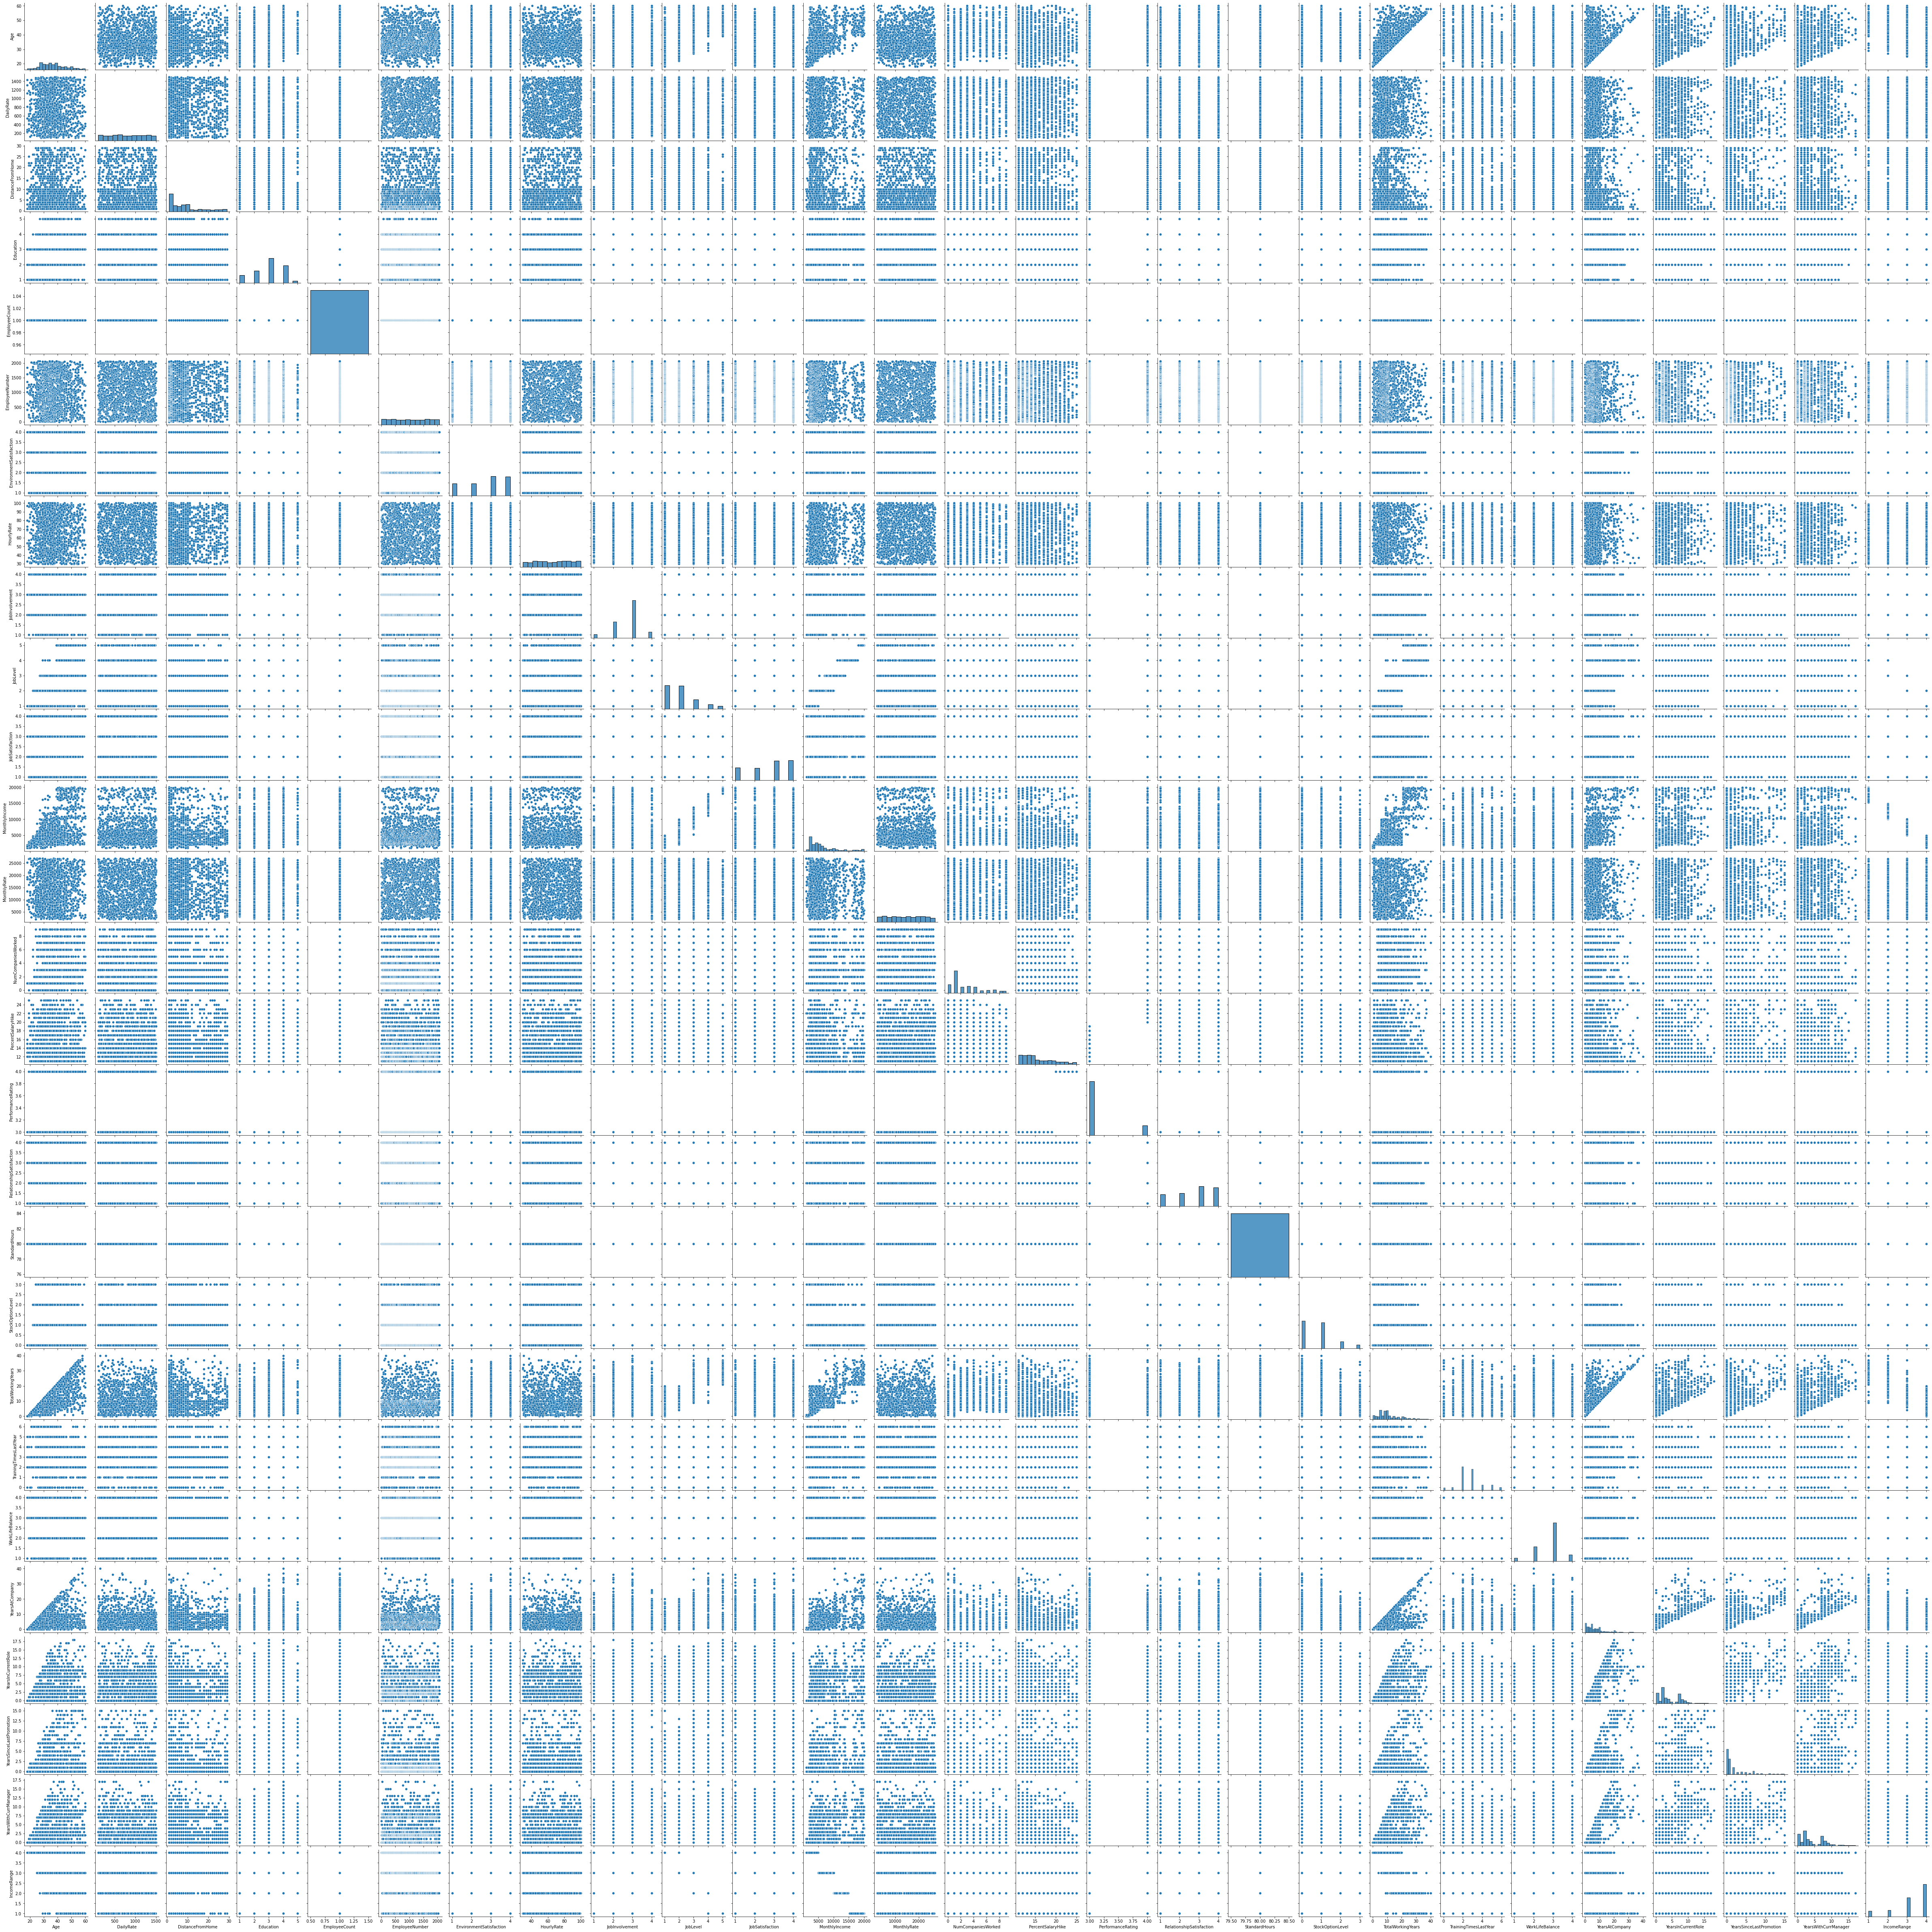

In [36]:
sns.pairplot(data)

In [ ]:
sns.pairplot(data, hue="Attrition")

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
